# Factor Analysis

(The tool you might not be using)

Everyone knows that you can use clustering to assign labels to the observations in your dataset.

But what if you want to understand how your *features* relate to one another?

Did you know there's a tool for that? It's called factor analysis, and it's commonly used in psychology research. This notebook is a quick introduction to how it works.

Data scientists can benefit from factor analysis because you can use it as a dimensionality reduction technique, similar to PCA. But I think factor analysis really shines when you're gathering psychometric data.

Let's say you want to have a deep and precise understanding of the people you're studying. They could be customers, employees, or students. But you want to have meaningful scores and rankings.

With a factor analysis, you can design a survey in which you "over-sample" your questions. Ask a ton -- way more than you think you need to. Factor analysis will tell you which questions were most meaningful and what "latent" (underlying) variables they appear to be measuring. It's a really fascinating -- not to mention useful -- process!

Confused? Don't worry -- it'll make more sense when we see it in a moment.

 
 
**The dataset**

The dataset I'll be using is a fun one: *The Young People Survey* by Miroslav Sabo. It examines various personality traits as well as things that Slovakian college students like and don't like.

You can find it here:

https://www.kaggle.com/miroslavsabo/young-people-survey


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import FactorAnalysis

sns.set_style('dark')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the (lightly-wrangled) data
data = pd.read_csv('responses2.csv')

# These will mess up our analysis if we keep them in the dataframe
weight = data.pop('weight')
height = data.pop('height')
age = data.pop('age')

# Remove extra column(s)
for col in data.columns:
    if 'unnamed' in col.lower():
        del data[col]

data.head()

,music,slow_songs_or_fast_songs,dance,folk,country,classical_music,musical,pop,rock,metal_or_hardrock,...,number_of_siblings,gender,left__right_handed,education,only_child,village__town,house__block_of_flats,i_am_always_on_time,i_lie_to_others,i_spend_a_lot_of_time_online
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,1.0,female,right handed,college/bachelor degree,no,village,block of flats,5,1,3
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,female,right handed,college/bachelor degree,no,city,block of flats,3,3,3
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,2.0,female,right handed,secondary school,no,city,block of flats,1,3,3
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow,3,2,5
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,1.0,female,right handed,secondary school,no,village,house/bungalow,5,5,3


In [3]:
# Dummify the categorical variables

for i in data.columns:
    if data[i].dtype == 'O':
        dums = pd.get_dummies(data[i], prefix=i+'_')
        del data[i]
        data = pd.concat([data, dums], axis=1)

# Now that everything is numerical, let's just use the median
# for missing values.
data.fillna(data.median(), inplace=True)

data.dtypes.value_counts()

float64    131
uint8       26
int64        8
dtype: int64

# Determining the number of factors

Just like with clustering, you typically don't know how many "factors" are ideal for your data. There's going to be some trial and error here.

Guadagnoli & Velicer (1988) consider a factor to be reliable if it has 4 or more loadings of at least 0.6, regardless of the sample size. Meanwhile, MacCallum et al. (1999, 2001) assert that I could go as low as 0.3 with the current sample size I have.

Since 0.6 doesn't give good results with this dataset, I'll settle on 0.4 instead.

The code below analyzes how many factors to use. This is its process:

1. Fit the factor analysis to our data. We'll start at one factor and gradually add more to see what works best.

2. For each factor, look at the 4 features that "load" the most strongly. Like correlations, we're looking at the absolute values here. Whether the numbers are positive or negative is mostly irrelevant. We're looking at the top 4 because of what we saw earlier in terms of reliability. We want to measure the same variable at least 4 different ways to get a really precise measurement.

3. For each of the factors we have, we take the weakest loading of the top 4, and then the weakest loading across *all* of the factors. If any of the weakest scores are below 0.4, then we have too many factors.

In [4]:
from sklearn.decomposition import FactorAnalysis
print('Minimum factor loadings for n factors:\n')

for n_comp in range(1,21):
    print(n_comp, end=': ')
    fa = FactorAnalysis(n_components=n_comp).fit(data)

    # Stick it in a dataframe
    factors = pd.DataFrame(fa.components_, columns=data.columns).T
    
    # Record and compare minimum factor loadings
    mins = []
    for i in factors.columns:
        factors['absol'] = abs(factors[i])
        factors_sorted = factors.sort_values('absol', ascending=False).head(4) # Top 4
        mins.append(factors_sorted['absol'].min())                             # Min value
        del factors['absol']
    
    print(np.min(np.array(mins)))

Minimum factor loadings for n factors:

1: 0.5602341221357283
2: 0.560463461131604
3: 0.5609574210742054
4: 0.45260815447720626
5: 0.40342127447605636
6: 0.294939713278729
7: 0.29502709319550374
8: 0.2748624015308651
9: 0.2748486391519195
10: 0.19773762195784178
11: 0.1977399387115115
12: 0.19238189322998026
13: 0.19206553949447674
14: 0.19251423633329182
15: 0.19168970185477138
16: 0.19200738290256628
17: 0.19259667730020377
18: 0.1927836156254579
19: 0.15274986149834205
20: 0.17110742889338112


With 5 factors, the weakest "top 4" loading is 0.40, which is exactly where we wanted to stop.

What's especially interesting about this is that it's widely accepted that there are 5 factors (or dimensions, if you prefer) of personality.

Does our analysis support this? Let's find out!

In [5]:
fa = FactorAnalysis(n_components=5).fit(data)

factors = pd.DataFrame(fa.components_, columns=data.columns).T

factors.head()

,0,1,2,3,4
music,-0.069381,0.070280,-0.078323,0.040963,0.081981
slow_songs_or_fast_songs,0.069407,-0.058750,-0.150641,0.073819,-0.046562
dance,-0.052838,0.051696,-0.477774,-0.184094,-0.058575
folk,-0.052562,0.494050,0.144885,-0.139008,-0.032167
country,0.081229,0.365244,0.115704,-0.045446,0.002401


Notice some of the stronger loadings above. Liking folk music is strongly linked to factor 1, while hating dance music is strongly linked to factor 2.

In [6]:
def show_loadings(factor=0, factors=factors):
    loadings = pd.DataFrame()
    loadings['loading'] = factors[factor]
    loadings['absol_' + str(factor)] = abs(loadings['loading'])
    loadings = loadings[loadings['absol_' + str(factor)] > 0.38]\
    .sort_values('absol_' + str(factor), ascending=False)
    return pd.DataFrame(loadings['loading'])

show_loadings(0)

,loading
i_cry_when_i_feel_down_or_things_dont_go_the_right_way,-0.791775
cars,0.636347
pc,0.614638
war,0.561039
reading,-0.551145
romantic,-0.541651
phobia_spiders,-0.523123
action,0.510810
shopping,-0.508355
gender__female,-0.488717


I'd call this factor "**masculinity**," for better or worse. We see the qualities of people who score high in this factor:

- They're not comfortable crying when they're upset.
- They like cars, computers, and war(?!).
- They don't like reading.
- They're not romantic.
- They're not afraid of spiders.
- They like action movies.
- They don't like shopping.
- They're... umm... not female.

In [7]:
show_loadings(1)

,loading
classical_music,0.719751
opera,0.648563
art_exhibitions,0.648239
musical_instruments,0.635492
swing_jazz,0.630821
theatre,0.607410
reading,0.588138
religion,0.552343
history,0.523211
medicine,0.515634


This happens to be a personality trait we call [**openness to experience**](https://en.wikipedia.org/wiki/Openness_to_experience)! People who score high in this trait like art, philosophy, culture, learning new things, and questioning the status quo. People who score low in this trait are conventional and old-fashioned.

In [8]:
show_loadings(2)

,loading
i_spend_a_lot_of_money_on_my_appearance,-0.710439
i_enjoy_going_to_large_shopping_centres,-0.679245
shopping,-0.678412
hiphop_rap,-0.638089
i_prefer_branded_clothing_to_non_branded,-0.572782
i_have_lots_of_friends,-0.507483
adrenaline_sports,-0.499998
active_sport,-0.498390
i_am_always_full_of_life_and_energy,-0.490674
dance,-0.477774


It might not be obvious, but this is actually measuring how **introverted** you are! A perhaps little-known fact about extraverts is that they like to go shopping more than introverts do.

This, combined with the fact that this factor is measuring how many friends you have, how much attention you like getting, and how energetic you are, makes me confident that our factor analysis has discovered the personality scale of extraversion/introversion.


In [9]:
show_loadings(3)

,loading
phobia_dangerous_dogs,-0.553878
phobia_snakes,-0.533101
phobia_rats,-0.469641
i_have_to_be_well_prepared_before_public_speaking,-0.436367
i_worry_about_my_health,-0.426880
i_prefer_big_dangerous_dogs_to_smaller_calmer_dogs,0.422508
metal_or_hardrock,0.395199
i_take_my_time_to_make_decisions,-0.389970
phobia_flying,-0.382831
adrenaline_sports,0.380849


Again, our factor analysis has uncovered a well-known personality trait: [**neuroticism**](https://en.wikipedia.org/wiki/Neuroticism), which is characterized by worrying, depression, shyness, and other negative emotions. More accurately, we discovered the inverse of neuroticism: emotional stability.

People who score high on this factor are not afraid of:

- Dogs
- Snakes
- Rats
- Public speaking
- Their health
- Extreme sports
- Flying

These people are also less likely to enjoy heavy metal. Interesting!

In [10]:
show_loadings(4)

,loading
i_wish_i_could_change_the_past_because_of_the_things_i_have_done,0.440735
i_am_always_on_time,-0.416822
i_feel_lonely_in_life,0.414363
phobia_aging,0.403421
i_have_damaged_things_in_the_past_when_angry,0.397323


Notice these loadings aren't as high as, say, factors 1 or 2. This, combined with the fact we seem to be seeing questions that measure neuroticism again, means that we probably should have asked a wider variety of questions.

It's also slightly problematic that it discovered masculinity as a personality trait, when it's really more of a gender/cultural phenomenon. Its closest analog in personality theory would be [agreeableness](https://en.wikipedia.org/wiki/Agreeableness) -- in which the average woman scores higher than 60% of men.

# Why Factor Analysis?

I like factor analysis because it provides additional insight into your features; it allows you to see which ones are effectively measuring the same latent variables, and then gives you a mathematically rigorous method for combining them to improve the reliability of your measurements. This is quite valuable when it comes to measuring something that's inherently unpredictable like human behavior.

Let's look at one last example before wrapping this project up. Let's say we want to measure how extraverted and social someone is. Perhaps we start by trying this:

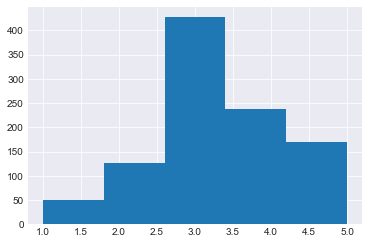

In [11]:
data['i_have_lots_of_friends'].hist(bins=5)



This data is pretty low-resolution, wouldn't you say? Everyone had to rate how much they agreed with that statement from 1-5.

Compare that to the "introversion" factor we discovered earlier:


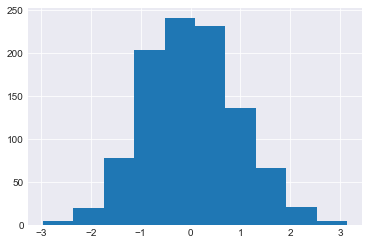

In [12]:
data_fa = pd.DataFrame(fa.transform(data))

data_fa[2].hist()

Suddenly we have a much clearer idea of how extraverted someone is, rather than relying on just one question. And, to reiterate an important point, this vastly improves the reliability of our data. It also allows for better comparisons between people.

That wraps up my introduction to factor analysis. Hope you found it useful!